# [Misc Cheminformatics Topics](https://www.rdkit.org/docs/RDKit_Book.html)
## Aromaticity
- 芳香性是一个既简单又复杂得令人不快的话题。由于实验化学家和理论化学家都无法就定义达成一致意见，因此有必要选择一些任意的定义并加以坚持。这就是 RDKit 所采用的方法。
- RDKit 中的芳香度感知代码没有使用模式来匹配已知的芳香系统，而是使用了一套规则。这些规则相对简单明了。- 芳香性是环中原子和键的一种属性。芳香键必须在芳香原子之间，但芳香原子之间的键不一定是芳香的。- 例如，RDKit 不认为这里的熔合键是芳香键：- ![](https://www.rdkit.org/docs/_images/picture_9.png)




In [5]:
from rdkit import Chem
m = Chem.MolFromSmiles('C1=CC2=C(C=C1)C1=CC=CC=C21')
m.GetAtomWithIdx(3).GetIsAromatic()

True

In [6]:
m.GetAtomWithIdx(6).GetIsAromatic()

True

In [7]:
m.GetBondBetweenAtoms(3,6).GetIsAromatic()

False

> RDKit 支持多种不同的芳香度模型，并允许用户通过提供分配芳香度的函数来定义自己的芳香度模型。


### RDKit 芳香度模型
- 如果一个环或融合环系统符合 4N+2 规则，则被认为是芳香族。电子数的贡献由原子类型和环境决定。
- 请注意，与电负性原子相连的外环键会从环原子上 "窃取 "价电子，而哑原子则会贡献使环成为芳香环所需的任何电子数。- 使用融合环来表示芳香性可能会导致单个环不芳香，但融合系统芳香的情况。薁就是一个例子：
- ![](https://www.rdkit.org/docs/_images/picture_8.png)- 这是一个极端的例子，同时展示了融合环和环外双键的影响：- ![](https://www.rdkit.org/docs/_images/picture_7.png)



| 单元格 |ns

In [8]:
m=Chem.MolFromSmiles('O=C1C=CC(=O)C2=C1OC=CO2')
m.GetAtomWithIdx(6).GetIsAromatic()

True

In [9]:
m.GetAtomWithIdx(7).GetIsAromatic()


True

In [10]:
m.GetBondBetweenAtoms(6,7).GetIsAromatic()

False

- 一种特殊情况是，带有基团的杂原子不被认为是芳香性的候选原子：
- ![](https://www.rdkit.org/docs/_images/picture_10.png)

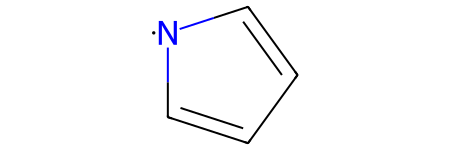

In [11]:
m = Chem.MolFromSmiles('C1=C[N]C=C1')
m

In [12]:
m.GetAtomWithIdx(0).GetIsAromatic()

False

In [13]:
m.GetAtomWithIdx(2).GetIsAromatic()

False

In [14]:
m.GetAtomWithIdx(2).GetNumRadicalElectrons()

1

- 也不考虑带有自由基的带电碳：
- ![](https://www.rdkit.org/docs/_images/picture_12.png)

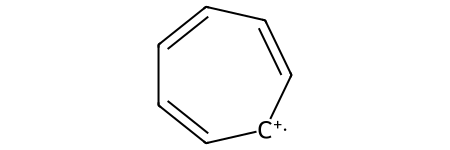

In [16]:
m = Chem.MolFromSmiles('C1=CC=CC=C[C+]1')
m

In [17]:
m.GetAtomWithIdx(0).GetIsAromatic()


False

In [18]:
m.GetAtomWithIdx(6).GetIsAromatic()

False

In [19]:
m.GetAtomWithIdx(6).GetFormalCharge()


1

In [20]:
m.GetAtomWithIdx(6).GetNumRadicalElectrons()


1

- 不过，带有自由基的中性碳仍在考虑之列：
- ![](https://www.rdkit.org/docs/_images/picture_11.png)

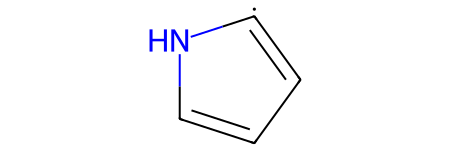

True

In [22]:
m = Chem.MolFromSmiles('C1=[C]NC=C1')
display(m)
m.GetAtomWithIdx(0).GetIsAromatic()

In [23]:
m.GetAtomWithIdx(1).GetIsAromatic()

True

In [24]:
m.GetAtomWithIdx(1).GetNumRadicalElectrons()

1

### 简单芳香模型
- 这个问题非常简单：只有五元和六元单环被认为是芳香性的候选对象。使用的电子贡献计数与上述相同。
### MDL 芳香度模型
- 略



### SMILES 支持和扩展
- RDKit 涵盖了 [Daylight SMILES](https://www.rdkit.org/docs/RDKit_Book.html#smiles)  的所有标准功能以及一些有用的扩展功能。

#### 芳香性- te（芳香族 Te）被接受。下面是一个关于 2-羧酸碲的例子：



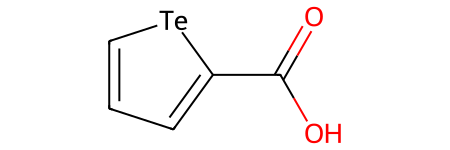

In [25]:
m = Chem.MolFromSmiles('OC(=O)c1[te]ccc1')
m

In [26]:
m.GetAtomWithIdx(4).GetIsAromatic()

True

#### 配位键
- <-和->在原子之间形成一个与键，方向很重要。
- 下面是一个双铜复合体的例子：


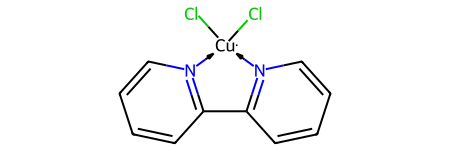

In [27]:
bipycu = Chem.MolFromSmiles('c1cccn->2c1-c1n->3cccc1.[Cu]23(Cl)Cl')
bipycu

In [28]:
bipycu.GetBondBetweenAtoms(4,12).GetBondType()


rdkit.Chem.rdchem.BondType.DATIVE

In [29]:
Chem.MolToSmiles(bipycu)

'Cl[Cu]1(Cl)<-n2ccccc2-c2ccccn->12'

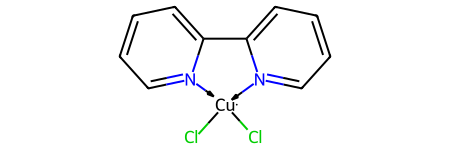

In [30]:
Chem.MolFromSmiles('Cl[Cu]1(Cl)<-n2ccccc2-c2ccccn->12')

- 配价键的特点是不影响起始原子的化合价，但会影响末端原子的化合价。因此，在这种情况下，参与配位键的 N 原子的价为 3，这是我们对双键的预期，而 Cu 的价为 4：


In [31]:
bipycu.GetAtomWithIdx(4).GetTotalValence()

3

In [32]:
bipycu.GetAtomWithIdx(12).GetTotalValence()

4

#### 闭环
- 环闭包支持%(N)表示法，其中N是个位数%(N)到五位数%(NNNNN)。下面是一个例子:


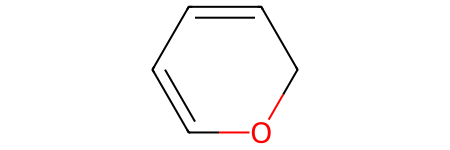

In [53]:
m = Chem.MolFromSmiles('C%(1000)Occcc%(1000)')
m

In [54]:
m.GetAtomWithIdx(0).IsInRing()

True

In [55]:
m.GetAtomWithIdx(2).IsInRing()

True

#### 用原子序数指定原子
- SMILES 支持 SMARTS 中的 [#6] 结构。####  四重键
- 符号 $ 可用来表示 SMILES 和 SMARTS 中的四重键。

#### CXSMILES / CXSMARTS扩展
- RDKit 支持解析和写入 ChemAxon 引入的 SMILES/SMARTS 扩展功能的子集。


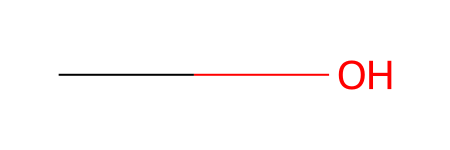

In [56]:
m = Chem.MolFromSmiles('OC')
m

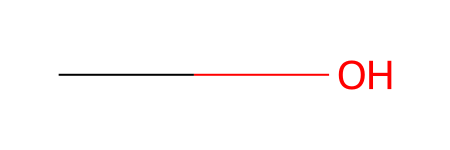

In [57]:
m.GetAtomWithIdx(0).SetProp('p1','2')
m

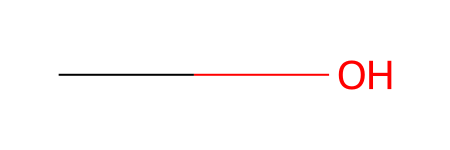

In [58]:
m.GetAtomWithIdx(1).SetProp('p1','5')
m

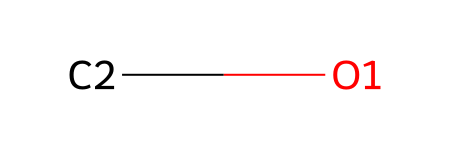

In [62]:
m.GetAtomWithIdx(1).SetProp('p2','A1')
m.GetAtomWithIdx(0).SetProp('atomLabel','O1')
m

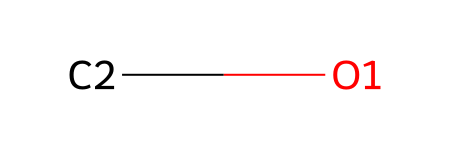

In [64]:
m.GetAtomWithIdx(1).SetProp('atomLabel','C2')
m

In [65]:
Chem.MolToCXSmiles(m)

'CO |$C2;O1$,atomProp:0.p1.5:0.p2.A1:1.p1.2|'

#### 读取分子名称
- 如果 SMILES/SMARTS 和可选的 CXSMILES 扩展名后面是空白和另一个字符串，SMILES/SMARTS 分析程序会将其解释为分子名称：


In [67]:
m = Chem.MolFromSmiles('CO carbon monoxide')
m.GetProp('_Name')


'carbon monoxide'

In [68]:
m2 = Chem.MolFromSmiles('CO |$C2;O1$| carbon monoxide')
m2.GetAtomWithIdx(0).GetProp('atomLabel')

'C2'

In [69]:
m2.GetProp('_Name')

'carbon monoxide'

- 这可以在解析CXSMILES时禁用:

In [71]:
ps = Chem.SmilesParserParams()
ps.parseName = False
m3 = Chem.MolFromSmiles('CO |$C2;O1$| carbon monoxide',ps)
m3.HasProp('_Name')

0

In [72]:
m3.GetAtomWithIdx(0).GetProp('atomLabel')

'C2'

- 请注意，如果禁用 CXSMILES 解析，但输入包含 CXSMILES 的字符串，它将被解释为名称的一部分：

In [73]:
ps = Chem.SmilesParserParams()
ps.allowCXSMILES = False
m4 = Chem.MolFromSmiles('CO |$C2;O1$| carbon monoxide',ps)
m4.GetProp('_Name')

'|$C2;O1$| carbon monoxide'

- 最后，如果禁用 CXSMILES 和名称的解析，那么 SMILES/SMARTS 字符串中的额外文本将导致错误： ... doctest：


In [75]:
ps = Chem.SmilesParserParams()
ps.allowCXSMILES = False
ps.parseName = False
m5 = Chem.MolFromSmiles('CO |$C2;O1$| carbon monoxide',ps)
m5 is None

[19:37:21] SMILES Parse Error: syntax error while parsing: CO |$C2;O1$| carbon monoxide
[19:37:21] SMILES Parse Error: Failed parsing SMILES 'CO |$C2;O1$| carbon monoxide' for input: 'CO |$C2;O1$| carbon monoxide'


True

In [76]:
m5 = Chem.MolFromSmiles('CO carbon monoxide',ps)
m5 is None

[19:37:30] SMILES Parse Error: syntax error while parsing: CO carbon monoxide
[19:37:30] SMILES Parse Error: Failed parsing SMILES 'CO carbon monoxide' for input: 'CO carbon monoxide'


True

- 本节中的示例都使用了 SMILES 解析器，但 SMARTS 解析器的行为方式相同。
